Mounted at /content/drive

Processing project: Bugzilla

Raw severity values found in Bugzilla:
{'critical', 'minor', 'normal', 'blocker', 'trivial', 'major', 'enhancement'}

Project: Bugzilla
Total bug reports: 4616
Enhancement reports: 0

Processing project: CDT

Raw severity values found in CDT:
{'critical', 'minor', 'normal', 'blocker', 'trivial', 'major', 'enhancement'}

Project: CDT
Total bug reports: 5640
Enhancement reports: 0

Processing project: Core

Raw severity values found in Core:
{'critical', 'minor', 'normal', 'blocker', 'trivial', 'major', 'enhancement'}

Project: Core
Total bug reports: 74292
Enhancement reports: 0

Processing project: Firefox

Raw severity values found in Firefox:
{'critical', 'minor', 'normal', 'blocker', 'trivial', 'major', 'enhancement'}

Project: Firefox
Total bug reports: 69879
Enhancement reports: 0

Processing project: JDT

Raw severity values found in JDT:
{'critical', 'minor', 'normal', 'blocker', 'trivial', 'major', 'enhancement'}

Project

<Figure size 1500x800 with 0 Axes>

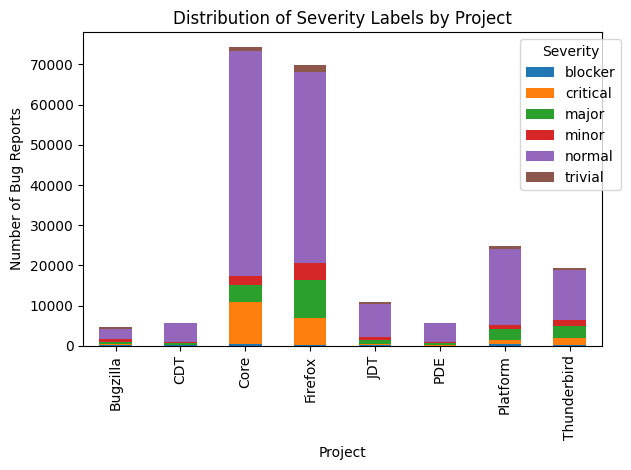

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def get_latest_update(report):
    """Get the latest non-empty update value from a report"""
    updates = report.findall('.//update')
    latest_value = None
    latest_time = -1

    for update in updates:
        when = int(update.find('when').text)
        what = update.find('what').text

        if when > latest_time and what is not None and what.strip():
            latest_time = when
            latest_value = what.strip()

    return latest_value

def process_project(project):
    print(f"\nProcessing project: {project}")
    project_folder = os.path.join(destination_directory, project)
    severity_file = os.path.join(project_folder, 'severity.xml')

    if not os.path.exists(severity_file):
        print(f"Severity file not found for {project}")
        return pd.DataFrame()

    try:
        tree = ET.parse(severity_file)
        root = tree.getroot()

        # Print raw severity values for debugging
        print(f"\nRaw severity values found in {project}:")
        severity_values = set()
        for report in root.findall('.//report'):
            for update in report.findall('.//update'):
                what = update.find('what')
                if what is not None and what.text:
                    severity_values.add(what.text.lower())
        print(severity_values)

        # Check specifically for enhancement
        enhancement_count = 0
        total_reports = 0
        latest_severities = {}

        for report in root.findall('.//report'):
            bug_id = report.get('id')
            latest_value = get_latest_update(report)

            if latest_value:
                total_reports += 1
                latest_value = latest_value.lower()
                latest_severities[bug_id] = latest_value
                if latest_value == 'enhancement':
                    enhancement_count += 1

        print(f"\nProject: {project}")
        print(f"Total bug reports: {total_reports}")
        print(f"Enhancement reports: {enhancement_count}")

        # Create DataFrame
        records = [
            {'project': project, 'bug_id': bug_id, 'severity': severity}
            for bug_id, severity in latest_severities.items()
        ]

        return pd.DataFrame(records)

    except ET.ParseError as e:
        print(f"Error parsing severity file for {project}: {e}")
        return pd.DataFrame()

# Process all projects and combine data
dfs = []
enhancement_stats = []

for project in projects:
    df = process_project(project)
    if not df.empty:
        dfs.append(df)

        # Collect enhancement statistics
        project_enhancements = df[df['severity'] == 'enhancement'].shape[0]
        project_total = df.shape[0]
        enhancement_stats.append({
            'project': project,
            'total_bugs': project_total,
            'enhancements': project_enhancements,
            'enhancement_percentage': (project_enhancements/project_total*100) if project_total > 0 else 0
        })

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Overall statistics
    print("\n=== Overall Statistics ===")
    print("\nTotal bug reports by severity:")
    severity_counts = all_data['severity'].value_counts()
    print(severity_counts)

    # Enhancement specific statistics
    print("\n=== Enhancement Statistics ===")
    enhancement_df = pd.DataFrame(enhancement_stats)
    print("\nEnhancement counts by project:")
    print(enhancement_df.to_string(index=False))

    # Visualization of severity distribution
    plt.figure(figsize=(15, 8))
    severity_by_project = pd.crosstab(all_data['project'], all_data['severity'])

    # Print raw data for verification
    print("\n=== Raw Data Verification ===")
    print("\nUnique severity values found:", sorted(all_data['severity'].unique()))
    print("\nCross-tabulation of severity by project:")
    print(severity_by_project)

    # Create stacked bar chart
    severity_by_project.plot(kind='bar', stacked=True)
    plt.title('Distribution of Severity Labels by Project')
    plt.xlabel('Project')
    plt.ylabel('Number of Bug Reports')
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

else:
    print("\nNo data found to visualize")


Processing project: Bugzilla

Found 4616 bugs with severity information for Bugzilla

Severity distribution:
severity
normal      2478
minor        766
major        506
trivial      415
blocker      275
critical     176
Name: count, dtype: int64

Processing project: CDT

Found 5640 bugs with severity information for CDT

Severity distribution:
severity
normal      4547
major        490
minor        275
critical     166
trivial       84
blocker       78
Name: count, dtype: int64

Processing project: Core

Found 74292 bugs with severity information for Core

Severity distribution:
severity
normal      56125
critical    10542
major        4243
minor        2072
trivial       859
blocker       451
Name: count, dtype: int64

Processing project: Firefox

Found 69879 bugs with severity information for Firefox

Severity distribution:
severity
normal      47635
major        9486
critical     6603
minor        4145
trivial      1777
blocker       233
Name: count, dtype: int64

Processing projec

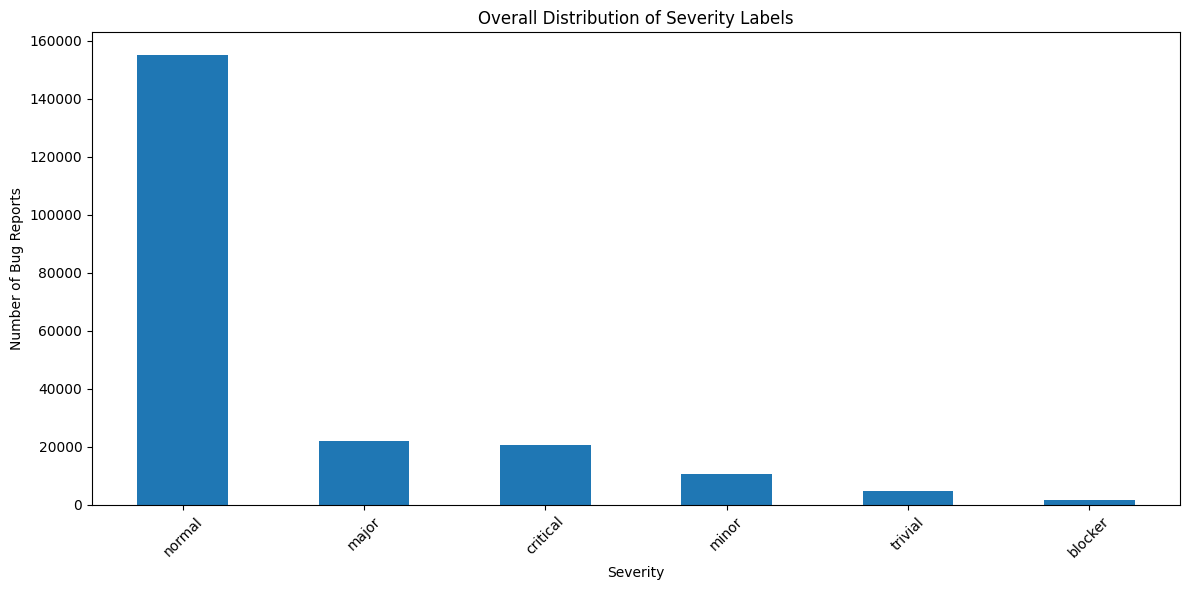

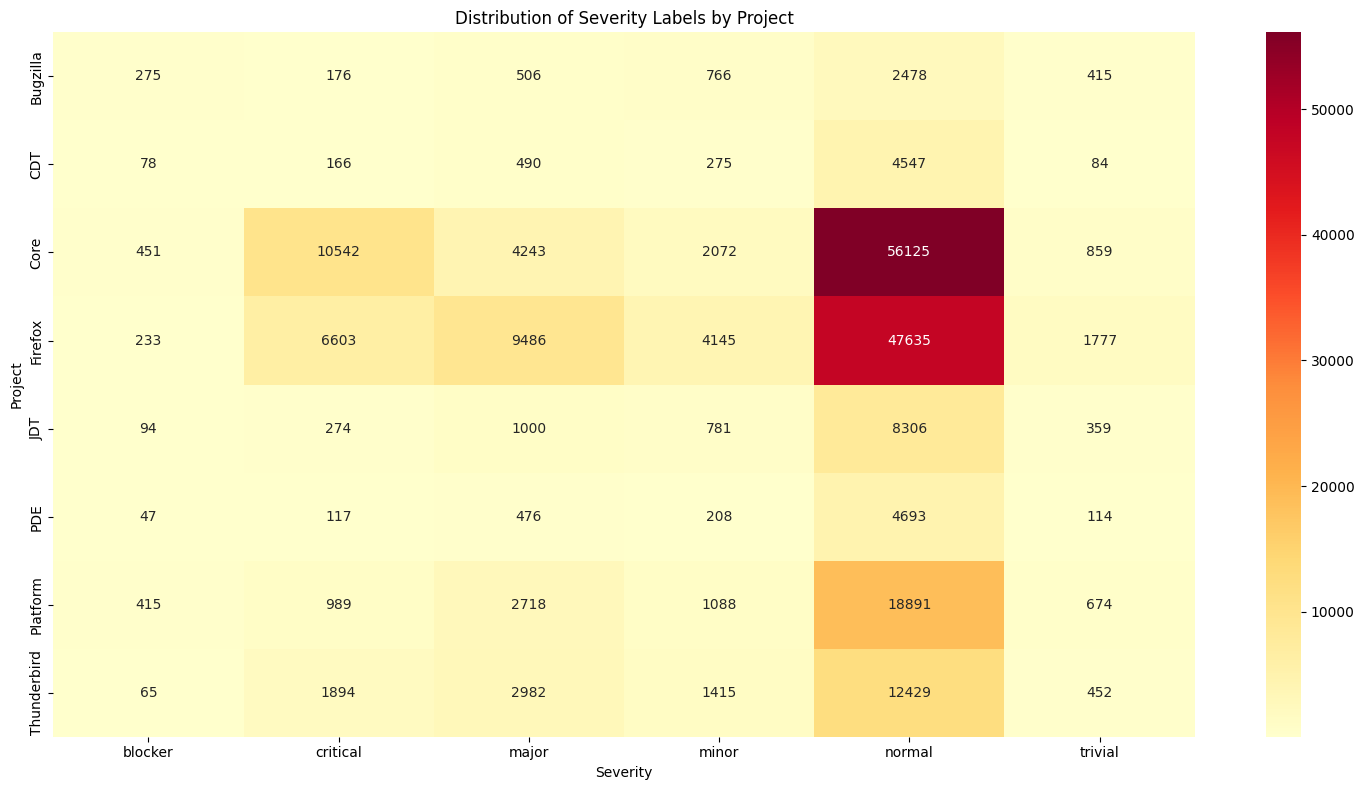

<Figure size 1500x800 with 0 Axes>

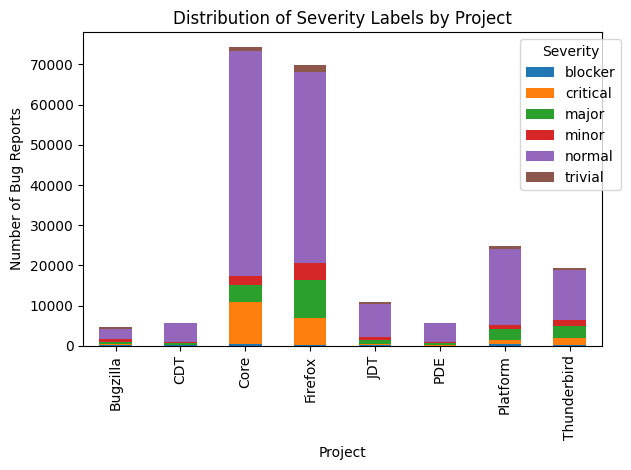


Detailed Statistics:

1. Total bug reports by severity:
severity
normal      155104
major        21901
critical     20761
minor        10750
trivial       4734
blocker       1658
Name: count, dtype: int64

2. Severity distribution by project:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla         275       176    506    766    2478      415
CDT               78       166    490    275    4547       84
Core             451     10542   4243   2072   56125      859
Firefox          233      6603   9486   4145   47635     1777
JDT               94       274   1000    781    8306      359
PDE               47       117    476    208    4693      114
Platform         415       989   2718   1088   18891      674
Thunderbird       65      1894   2982   1415   12429      452

3. Percentage distribution of severities within each project:
severity     blocker  critical  major  minor  normal  trivial
project    

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def get_latest_update(report):
    """Get the latest non-empty update value from a report"""
    updates = report.findall('.//update')
    latest_value = None
    latest_time = -1

    for update in updates:
        when = int(update.find('when').text)
        what = update.find('what').text

        if when > latest_time and what is not None and what.strip():
            latest_time = when
            latest_value = what.strip()

    return latest_value

def parse_severity_file(file_path):
    """Parse severity XML file and return a dictionary of id: severity"""
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return {}

    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        severity_dict = {}

        for report in root.findall('.//report'):
            bug_id = report.get('id')
            latest_value = get_latest_update(report)

            if bug_id and latest_value:
                severity_dict[bug_id] = latest_value.lower()

        return severity_dict
    except ET.ParseError as e:
        print(f"Error parsing {file_path}: {e}")
        return {}

def process_project(project):
    print(f"\nProcessing project: {project}")
    project_folder = os.path.join(destination_directory, project)

    # Parse severity file
    severity_dict = parse_severity_file(os.path.join(project_folder, 'severity.xml'))

    # Create records for all bugs with severity information
    records = []
    for bug_id, severity in severity_dict.items():
        records.append({
            'project': project,
            'bug_id': bug_id,
            'severity': severity
        })

    df = pd.DataFrame(records)
    print(f"\nFound {len(df)} bugs with severity information for {project}")
    if not df.empty:
        print("\nSeverity distribution:")
        print(df['severity'].value_counts())

    return df

# Process all projects and combine data
dfs = []
for project in projects:
    df = process_project(project)
    if not df.empty:
        dfs.append(df)

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Print overall severity distribution
    print("\nOverall Severity Distribution:")
    severity_counts = all_data['severity'].value_counts()
    print(severity_counts)

    # Create a bar plot for overall severity distribution
    plt.figure(figsize=(12, 6))
    severity_counts.plot(kind='bar')
    plt.title('Overall Distribution of Severity Labels')
    plt.xlabel('Severity')
    plt.ylabel('Number of Bug Reports')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Create heatmap of severity distribution by project
    severity_by_project = pd.crosstab(all_data['project'], all_data['severity'])

    plt.figure(figsize=(15, 8))
    sns.heatmap(severity_by_project, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Distribution of Severity Labels by Project')
    plt.ylabel('Project')
    plt.xlabel('Severity')
    plt.tight_layout()
    plt.show()

    # Create stacked bar chart of severity distribution by project
    plt.figure(figsize=(15, 8))
    severity_by_project.plot(kind='bar', stacked=True)
    plt.title('Distribution of Severity Labels by Project')
    plt.xlabel('Project')
    plt.ylabel('Number of Bug Reports')
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\nDetailed Statistics:")
    print("\n1. Total bug reports by severity:")
    print(severity_counts)

    print("\n2. Severity distribution by project:")
    print(severity_by_project)

    print("\n3. Percentage distribution of severities within each project:")
    percentage_by_project = severity_by_project.div(severity_by_project.sum(axis=1), axis=0) * 100
    print(percentage_by_project.round(2))

    print("\n4. Summary statistics:")
    print(f"Total number of bug reports: {len(all_data)}")
    print("\nBug reports per project:")
    print(all_data['project'].value_counts())

else:
    print("\nNo data found to visualize")


Processing project: Bugzilla
Total bugs with status: 4616
Status values found: {'verified', 'resolved', 'closed'}
Total bugs with resolution: 4616
Resolution values found: {'worksforme', 'wontfix', 'incomplete', 'duplicate', 'invalid', 'fixed'}
Total bugs with severity: 4616
Severity values found: {'critical', 'minor', 'normal', 'blocker', 'major', 'trivial'}

Found 2375 bugs with status='RESOLVED', resolution='FIXED' and severity for Bugzilla

Severity distribution:
severity
normal      996
minor       483
trivial     285
blocker     262
major       251
critical     98
Name: count, dtype: int64

Processing project: CDT
Total bugs with status: 5640
Status values found: {'verified', 'resolved', 'closed'}
Total bugs with resolution: 5640
Resolution values found: {'worksforme', 'wontfix', 'duplicate', 'invalid', 'not_eclipse', 'fixed'}
Total bugs with severity: 5640
Severity values found: {'critical', 'minor', 'normal', 'blocker', 'major', 'trivial'}

Found 3982 bugs with status='RESOLVE

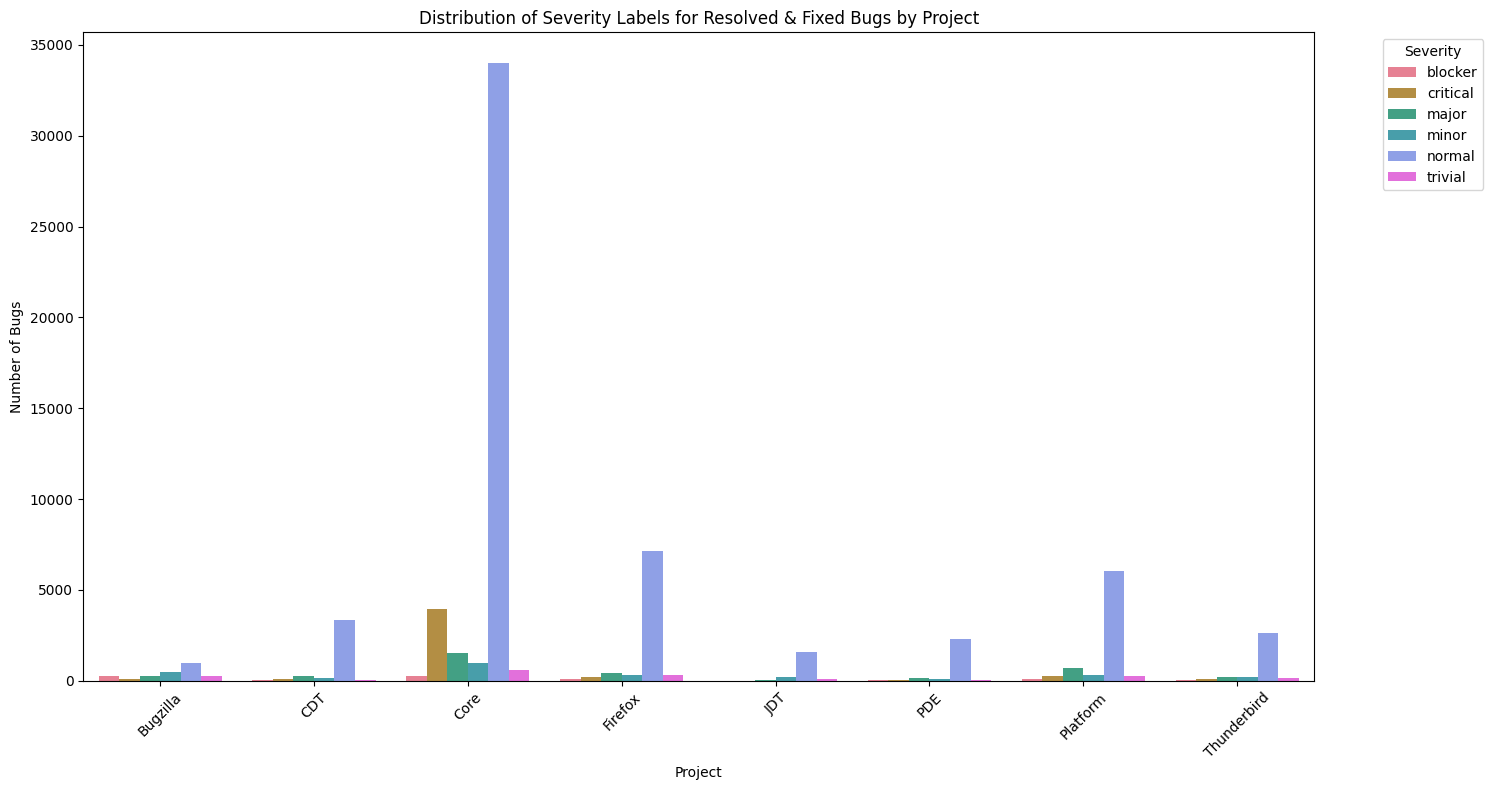


Summary Statistics:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla         262        98    251    483     996      285
CDT               34        79    261    177    3368       63
Core             243      3956   1532   1000   33990      578
Firefox           81       178    414    342    7143      316
JDT                1        10     28    185    1584      120
PDE               13        50    167    118    2285       55
Platform          84       249    677    298    6044      271
Thunderbird       20       115    231    196    2615      133

Percentage Distribution:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla       11.03      4.13  10.57  20.34   41.94    12.00
CDT             0.85      1.98   6.55   4.45   84.58     1.58
Core            0.59      9.58   3.71   2.42   82.30     1.40
Firefox         0.96   

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

# Define all known severity labels
SEVERITY_LABELS = {
    'blocker',
    'critical',
    'major',
    'normal',
    'minor',
    'trivial',
    'enhancement'
}

def get_latest_update(report):
    """Get the latest non-empty update value from a report"""
    updates = report.findall('.//update')
    latest_value = None
    latest_time = -1

    for update in updates:
        when = int(update.find('when').text)
        what = update.find('what').text

        if when > latest_time and what is not None and what.strip():
            latest_time = when
            latest_value = what.strip()

    return latest_value

def parse_xml_file(file_path):
    """Parse XML file and return a dictionary of id: latest_value"""
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return {}

    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        bug_dict = {}
        all_values = set()  # Track all unique values

        for report in root.findall('.//report'):
            bug_id = report.get('id')
            latest_value = get_latest_update(report)

            if bug_id and latest_value:
                latest_value = latest_value.lower()  # Normalize to lowercase
                bug_dict[bug_id] = latest_value
                all_values.add(latest_value)

        return bug_dict, all_values
    except ET.ParseError as e:
        print(f"Error parsing {file_path}: {e}")
        return {}, set()

def process_project(project):
    print(f"\nProcessing project: {project}")
    project_folder = os.path.join(destination_directory, project)

    # Parse all relevant files
    status_dict, status_values = parse_xml_file(os.path.join(project_folder, 'bug_status.xml'))
    resolution_dict, resolution_values = parse_xml_file(os.path.join(project_folder, 'resolution.xml'))
    severity_dict, severity_values = parse_xml_file(os.path.join(project_folder, 'severity.xml'))

    # Print debug information
    print(f"Total bugs with status: {len(status_dict)}")
    print(f"Status values found: {status_values}")
    print(f"Total bugs with resolution: {len(resolution_dict)}")
    print(f"Resolution values found: {resolution_values}")
    print(f"Total bugs with severity: {len(severity_dict)}")
    print(f"Severity values found: {severity_values}")

    # Create records for bugs that meet all conditions
    records = []
    for bug_id in status_dict:
        if (bug_id in resolution_dict and
            bug_id in severity_dict and
            status_dict[bug_id].upper() == 'RESOLVED' and
            resolution_dict[bug_id].upper() == 'FIXED'):

            severity = severity_dict[bug_id].lower()
            if severity in SEVERITY_LABELS:  # Only include known severity labels
                records.append({
                    'project': project,
                    'bug_id': bug_id,
                    'severity': severity,
                    'status': status_dict[bug_id],
                    'resolution': resolution_dict[bug_id]
                })

    df = pd.DataFrame(records)
    print(f"\nFound {len(df)} bugs with status='RESOLVED', resolution='FIXED' and severity for {project}")
    if not df.empty:
        print("\nSeverity distribution:")
        print(df['severity'].value_counts())

    return df

# Process all projects and combine data
dfs = []
for project in projects:
    df = process_project(project)
    if not df.empty:
        dfs.append(df)

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Print data summary
    print("\nOverall Data Summary:")
    print(f"Total number of bugs: {len(all_data)}")
    print("\nBugs per project:")
    print(all_data['project'].value_counts())
    print("\nSeverity levels found:")
    print(all_data['severity'].value_counts())
    print("\nAll possible severity levels:", sorted(SEVERITY_LABELS))
    print("Severity levels found in data:", sorted(all_data['severity'].unique()))

    # Create visualization with consistent colors for severity levels
    plt.figure(figsize=(15, 8))

    # Create a color palette for all severity levels
    colors = sns.color_palette("husl", n_colors=len(SEVERITY_LABELS))
    severity_colors = dict(zip(sorted(SEVERITY_LABELS), colors))

    # Create the plot
    sns.countplot(data=all_data, x='project', hue='severity',
                 hue_order=sorted(SEVERITY_LABELS & set(all_data['severity'].unique())),
                 palette=[severity_colors[s] for s in sorted(SEVERITY_LABELS & set(all_data['severity'].unique()))])

    plt.title('Distribution of Severity Labels for Resolved & Fixed Bugs by Project')
    plt.xlabel('Project')
    plt.ylabel('Number of Bugs')
    plt.xticks(rotation=45)
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics:")
    summary = all_data.groupby(['project', 'severity']).size().unstack(fill_value=0)
    print(summary)

    # Calculate percentages
    percentages = summary.div(summary.sum(axis=1), axis=0) * 100
    print("\nPercentage Distribution:")
    print(percentages.round(2))
else:
    print("\nNo data found to visualize")


Processing project: Bugzilla
Total bugs with status: 4616
Status values found: {'CLOSED', 'VERIFIED', 'RESOLVED'}
Total bugs with resolution: 4616
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME', 'INCOMPLETE', 'INVALID'}
Total bugs with severity: 4616
Severity values found: {'MAJOR', 'TRIVIAL', 'NORMAL', 'MINOR', 'CRITICAL', 'BLOCKER'}

Found 4287 bugs with status='RESOLVED' and both resolution and severity for Bugzilla

Resolution distribution:
resolution
FIXED         2375
DUPLICATE      742
INVALID        597
WORKSFORME     412
WONTFIX        156
INCOMPLETE       5
Name: count, dtype: int64

Severity distribution:
severity
normal      2275
minor        727
major        476
trivial      383
blocker      272
critical     154
Name: count, dtype: int64

Processing project: CDT
Total bugs with status: 5640
Status values found: {'CLOSED', 'VERIFIED', 'RESOLVED'}
Total bugs with resolution: 5640
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME

<Figure size 1500x800 with 0 Axes>

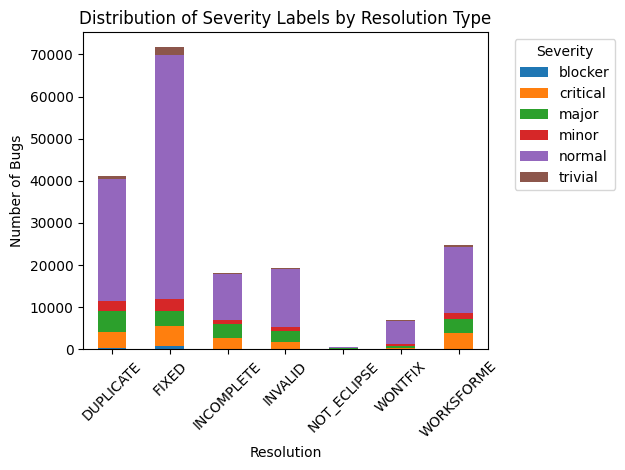

<Figure size 1500x800 with 0 Axes>

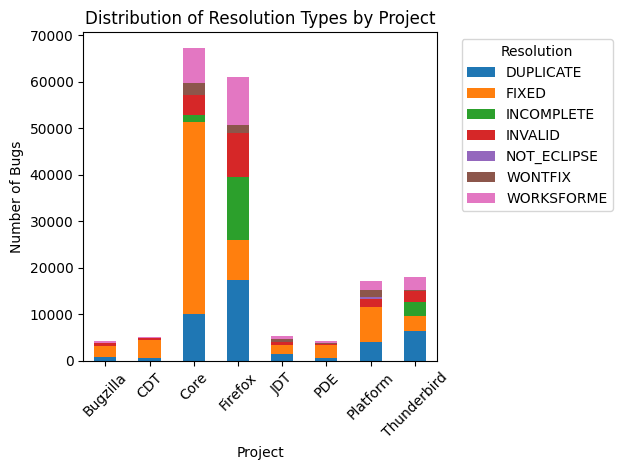


Cross-tabulation of Resolution and Severity:
severity     blocker  critical  major  minor  normal  trivial
resolution                                                   
DUPLICATE        258      3840   4864   2463   28959      776
FIXED            738      4735   3561   2799   58025     1821
INCOMPLETE         9      2578   3428   1025   10725      285
INVALID          129      1659   2590    989   13668      358
NOT_ECLIPSE       24        62     92     25     374        3
WONTFIX           41       232    437    461    5525      172
WORKSFORME       110      3851   3169   1413   15835      377

Cross-tabulation of Project and Resolution:
resolution   DUPLICATE  FIXED  INCOMPLETE  INVALID  NOT_ECLIPSE  WONTFIX  \
project                                                                    
Bugzilla           742   2375           5      597            0      156   
CDT                512   3982           0      317           56      101   
Core             10090  41299        1427     4

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def get_latest_update(report):
    """Get the latest non-empty update value from a report"""
    updates = report.findall('.//update')
    latest_value = None
    latest_time = -1

    for update in updates:
        when = int(update.find('when').text)
        what = update.find('what').text

        if when > latest_time and what is not None and what.strip():
            latest_time = when
            latest_value = what.strip()

    return latest_value

def parse_xml_file(file_path):
    """Parse XML file and return a dictionary of id: latest_value"""
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return {}, set()

    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        bug_dict = {}
        all_values = set()

        for report in root.findall('.//report'):
            bug_id = report.get('id')
            latest_value = get_latest_update(report)

            if bug_id and latest_value:
                latest_value = latest_value.upper()  # Normalize to uppercase
                bug_dict[bug_id] = latest_value
                all_values.add(latest_value)

        return bug_dict, all_values
    except ET.ParseError as e:
        print(f"Error parsing {file_path}: {e}")
        return {}, set()

def process_project(project):
    print(f"\nProcessing project: {project}")
    project_folder = os.path.join(destination_directory, project)

    # Parse all relevant files
    status_dict, status_values = parse_xml_file(os.path.join(project_folder, 'bug_status.xml'))
    resolution_dict, resolution_values = parse_xml_file(os.path.join(project_folder, 'resolution.xml'))
    severity_dict, severity_values = parse_xml_file(os.path.join(project_folder, 'severity.xml'))

    # Print debug information
    print(f"Total bugs with status: {len(status_dict)}")
    print(f"Status values found: {status_values}")
    print(f"Total bugs with resolution: {len(resolution_dict)}")
    print(f"Resolution values found: {resolution_values}")
    print(f"Total bugs with severity: {len(severity_dict)}")
    print(f"Severity values found: {severity_values}")

    # Create records for bugs with RESOLVED status
    records = []
    for bug_id in status_dict:
        if (bug_id in resolution_dict and
            bug_id in severity_dict and
            status_dict[bug_id] == 'RESOLVED'):

            records.append({
                'project': project,
                'bug_id': bug_id,
                'severity': severity_dict[bug_id].lower(),
                'status': status_dict[bug_id],
                'resolution': resolution_dict[bug_id]
            })

    df = pd.DataFrame(records)
    print(f"\nFound {len(df)} bugs with status='RESOLVED' and both resolution and severity for {project}")
    if not df.empty:
        print("\nResolution distribution:")
        print(df['resolution'].value_counts())
        print("\nSeverity distribution:")
        print(df['severity'].value_counts())

    return df

# Process all projects and combine data
dfs = []
for project in projects:
    df = process_project(project)
    if not df.empty:
        dfs.append(df)

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Print data summary
    print("\nOverall Data Summary:")
    print(f"Total number of bugs: {len(all_data)}")

    print("\nBugs per project:")
    print(all_data['project'].value_counts())

    print("\nResolution types found:")
    print(all_data['resolution'].value_counts())

    print("\nSeverity levels found:")
    print(all_data['severity'].value_counts())

    # Create visualization for severity distribution by resolution
    plt.figure(figsize=(15, 8))
    severity_resolution = pd.crosstab(all_data['resolution'], all_data['severity'])
    severity_resolution.plot(kind='bar', stacked=True)
    plt.title('Distribution of Severity Labels by Resolution Type')
    plt.xlabel('Resolution')
    plt.ylabel('Number of Bugs')
    plt.xticks(rotation=45)
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Create visualization for project distribution by resolution
    plt.figure(figsize=(15, 8))
    project_resolution = pd.crosstab(all_data['project'], all_data['resolution'])
    project_resolution.plot(kind='bar', stacked=True)
    plt.title('Distribution of Resolution Types by Project')
    plt.xlabel('Project')
    plt.ylabel('Number of Bugs')
    plt.xticks(rotation=45)
    plt.legend(title='Resolution', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print detailed cross-tabulation
    print("\nCross-tabulation of Resolution and Severity:")
    print(pd.crosstab(all_data['resolution'], all_data['severity']))

    print("\nCross-tabulation of Project and Resolution:")
    print(pd.crosstab(all_data['project'], all_data['resolution']))

    # Calculate percentages for each resolution type
    resolution_percentages = all_data['resolution'].value_counts(normalize=True) * 100
    print("\nPercentage Distribution of Resolution Types:")
    print(resolution_percentages.round(2))

else:
    print("\nNo data found to visualize")

#Dataset used for the experiments
Link: https://github.com/ansymo/msr2013-bug_dataset/tree/master/data/v02/eclipse

Citation: @inproceedings{LamkanfiMSR13,
	author    = {Ahmed Lamkanfi and Javier Perez and Serge Demeyer},
	title     = {The Eclipse and Mozilla Defect Tracking Dataset:
		a Genuine Dataset for Mining Bug Information},
	booktitle = {MSR '13: Proceedings of the 10th Working Conference on Mining Software Repositories,
		May 18-–19, 2013. San Francisco, California, USA},
	year      = {2013},
}


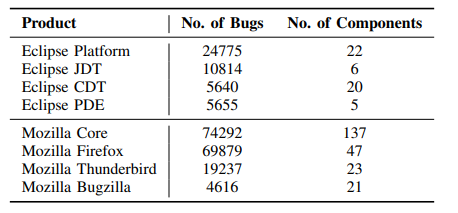



In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt


# Mount Google Drive #Skip
from google.colab import drive
drive.mount('/content/drive')

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def process_project(project):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Create an empty DataFrame to store bug data
    bug_data_df = pd.DataFrame(columns=['Project', 'Bug ID', 'Severity Label', 'Resolution Status', 'Short Description'])

    # Load all data into the DataFrame
    for xml_file in ['short_desc.xml', 'severity.xml', 'resolution.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Identify the type of XML file and extract relevant information
            if xml_file == 'short_desc.xml':
                reports = root.findall('.//report')
            elif xml_file == 'severity.xml':
                severities = root.findall('.//report')
            elif xml_file == 'resolution.xml':
                resolutions = root.findall('.//report')

    # Count bug reports for the project
    bug_reports_count = len(reports) if reports else 0

    return bug_reports_count

# Display the number of bug reports for each project
for project in projects:
    total_bug_reports = process_project(project)
    print(f"Project: {project}, Total number of bug reports: {total_bug_reports}")


Mounted at /content/drive
Project: Bugzilla, Total number of bug reports: 4616
Project: CDT, Total number of bug reports: 5640
Project: Core, Total number of bug reports: 74292
Project: Firefox, Total number of bug reports: 69879
Project: JDT, Total number of bug reports: 10814
Project: PDE, Total number of bug reports: 5655
Project: Platform, Total number of bug reports: 24775
Project: Thunderbird, Total number of bug reports: 19237


#Deep Neural Network-Based Severity Prediction of Bug Reports
We reuse the dataset created by Lamkanfi et al. [31]. They
investigated the bug repository of Bugzilla to extract bug
reports from Eclipse and Mozilla projects. They collected bug
reports and ignored the duplicate reports and enhancement
reports. Both projects Eclipse and Mozilla contain four products, respectively. From the dataset, we select bug reports
of seven open source products. Platform, CDT, JDT, Core,
Firefox, Thunderbird, and Bugzilla. We ignored bug reports
from GEF as it contains small number of bug reports. We use
summary attribute that defines the bug reports and severity
attribute that indicates how urgent it is needed to be resolved.
The total number of bug reports are 59616 in which approximately 8.39%, 16.77%, 16.77%, 16.77%, 16.77%, 16.77%,
and 7.76% of bug reports belong to each product, respectively

Platform, CDT, JDT, Core, Firefox, Thunderbird, and Bugzilla

* Total Bug reports = 59616
* Platform, 8.39% = 5001
* CDT, 16.77%= 9997
* JDT, 17.77%= 9997
* Core, 16.77%= 9997
* Firefox, 16.77%=9997
* Thunderbird, 16.77%= 9997
* BugZilla, 7.76%= 4626




1.   Ignore duplicate reports and enhancement reports
2.   Ignore the bug reports from GEF



In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def process_project(project):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Create an empty DataFrame to store bug data
    bug_data_df = pd.DataFrame(columns=['Project', 'Bug ID', 'Severity Label', 'Resolution Status', 'Short Description'])

    # Load all data into the DataFrame
    for xml_file in ['short_desc.xml', 'severity.xml', 'resolution.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Identify the type of XML file and extract relevant information
            if xml_file == 'short_desc.xml':
                reports = root.findall('.//report')
            elif xml_file == 'severity.xml':
                severities = root.findall('.//report')
            elif xml_file == 'resolution.xml':
                resolutions = root.findall('.//report')

    # Filter bug reports with severity = "enhancement"
    enhancement_bug_reports = [severity for severity in severities if severity.find('.//what[last()]') is not None and severity.find('.//what[last()]').text and severity.find('.//what[last()]').text.lower() == 'enhancement']
    total_enhancement_bug_reports = len(enhancement_bug_reports)

    return total_enhancement_bug_reports

# Display the number of bug reports with severity = "enhancement" for each project
for project in projects:
    total_enhancement_reports = process_project(project)
    print(f"Project: {project}, Total number of bug reports with severity 'enhancement': {total_enhancement_reports}")


Project: Bugzilla, Total number of bug reports with severity 'enhancement': 34
Project: CDT, Total number of bug reports with severity 'enhancement': 13
Project: Core, Total number of bug reports with severity 'enhancement': 60
Project: Firefox, Total number of bug reports with severity 'enhancement': 77
Project: JDT, Total number of bug reports with severity 'enhancement': 37
Project: PDE, Total number of bug reports with severity 'enhancement': 4
Project: Platform, Total number of bug reports with severity 'enhancement': 56
Project: Thunderbird, Total number of bug reports with severity 'enhancement': 54



Processing project: Bugzilla
Total bugs with resolution: 4616
Total bugs with severity: 4616
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME', 'INCOMPLETE', 'INVALID'}
Found 2432 bugs with resolution='FIXED' and severity for Bugzilla
Severity distribution:
severity
normal      1033
minor        492
trivial      289
blocker      265
major        253
critical     100
Name: count, dtype: int64

Processing project: CDT
Total bugs with resolution: 5640
Total bugs with severity: 5640
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME', 'NOT_ECLIPSE', 'INVALID'}
Found 4238 bugs with resolution='FIXED' and severity for CDT
Severity distribution:
severity
normal      3539
major        303
minor        194
critical      89
trivial       70
blocker       43
Name: count, dtype: int64

Processing project: Core
Total bugs with resolution: 74292
Total bugs with severity: 74292
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME', 'INCOMPL

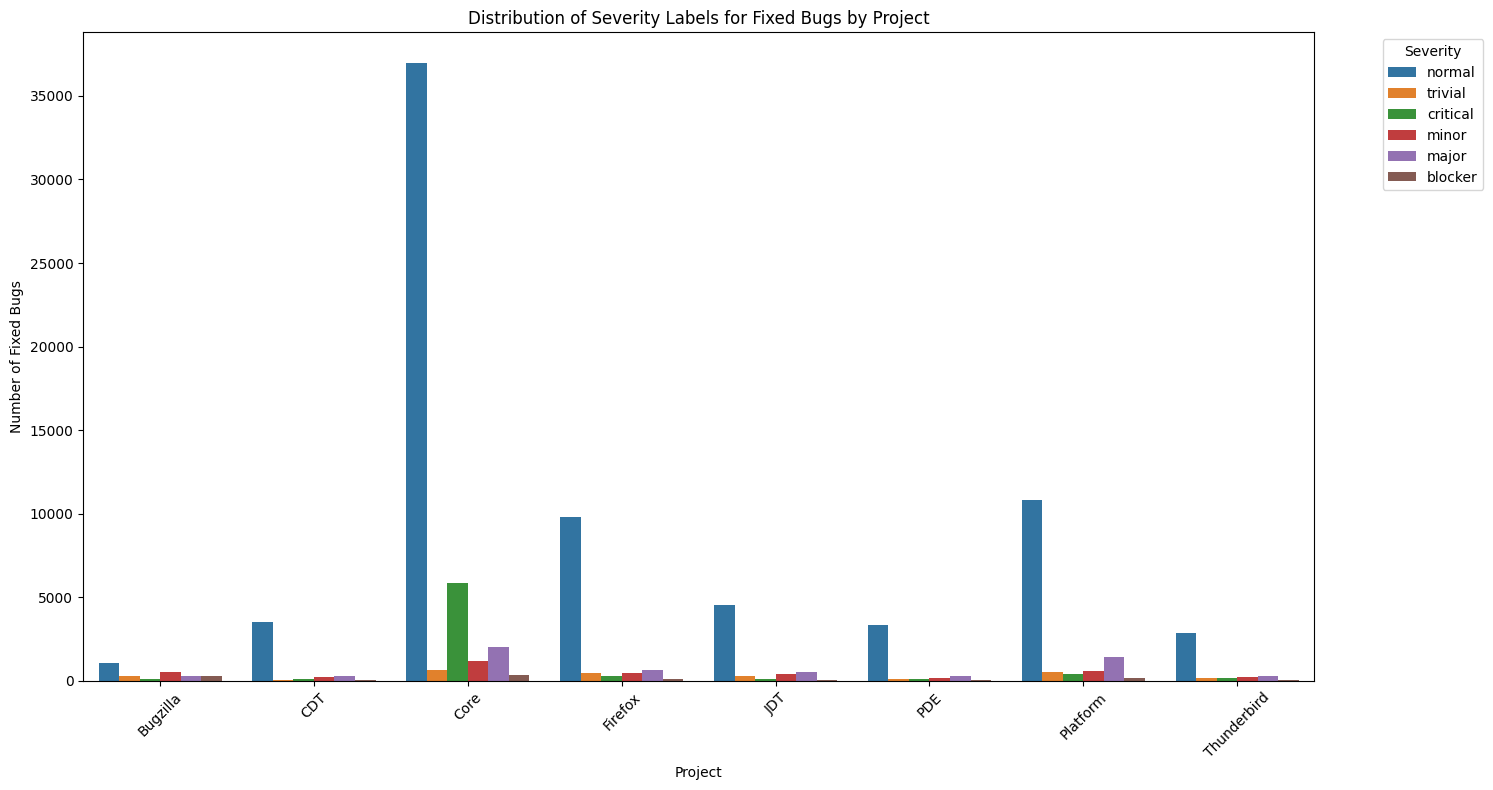


Summary Statistics:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla         265       100    253    492    1033      289
CDT               43        89    303    194    3539       70
Core             334      5834   2043   1157   36960      633
Firefox          122       275    670    474    9787      434
JDT               38       127    547    400    4508      294
PDE               24        81    303    155    3312       93
Platform         142       418   1412    580   10793      537
Thunderbird       34       145    287    222    2842      148

Percentage Distribution:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla       10.90      4.11  10.40  20.23   42.48    11.88
CDT             1.01      2.10   7.15   4.58   83.51     1.65
Core            0.71     12.42   4.35   2.46   78.70     1.35
Firefox         1.04   

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def get_latest_update(report):
    """Get the latest non-empty update value from a report"""
    updates = report.findall('.//update')
    latest_value = None
    latest_time = -1

    for update in updates:
        when = int(update.find('when').text)
        what = update.find('what').text

        if when > latest_time and what is not None and what.strip():
            latest_time = when
            latest_value = what.strip()

    return latest_value

def parse_xml_file(file_path):
    """Parse XML file and return a dictionary of id: latest_value"""
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return {}

    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        bug_dict = {}

        for report in root.findall('.//report'):
            bug_id = report.get('id')
            latest_value = get_latest_update(report)

            if bug_id and latest_value:
                bug_dict[bug_id] = latest_value.upper()  # Normalize to uppercase

        return bug_dict
    except ET.ParseError as e:
        print(f"Error parsing {file_path}: {e}")
        return {}

def process_project(project):
    print(f"\nProcessing project: {project}")
    project_folder = os.path.join(destination_directory, project)

    # Parse resolution and severity files
    resolution_dict = parse_xml_file(os.path.join(project_folder, 'resolution.xml'))
    severity_dict = parse_xml_file(os.path.join(project_folder, 'severity.xml'))

    # Print some debug information
    print(f"Total bugs with resolution: {len(resolution_dict)}")
    print(f"Total bugs with severity: {len(severity_dict)}")
    print(f"Resolution values found: {set(resolution_dict.values())}")

    # Create records for bugs that are fixed and have severity information
    records = []
    for bug_id in resolution_dict:
        if resolution_dict[bug_id] == 'FIXED' and bug_id in severity_dict:
            records.append({
                'project': project,
                'bug_id': bug_id,
                'severity': severity_dict[bug_id].lower()
            })

    df = pd.DataFrame(records)
    print(f"Found {len(df)} bugs with resolution='FIXED' and severity for {project}")
    if not df.empty:
        print("Severity distribution:")
        print(df['severity'].value_counts())

    return df

# Process all projects and combine data
dfs = []
for project in projects:
    df = process_project(project)
    if not df.empty:
        dfs.append(df)

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Print data summary
    print("\nOverall Data Summary:")
    print(f"Total number of bugs: {len(all_data)}")
    print("\nBugs per project:")
    print(all_data['project'].value_counts())
    print("\nSeverity levels found:")
    print(all_data['severity'].value_counts())

    # Create visualization
    plt.figure(figsize=(15, 8))
    sns.countplot(data=all_data, x='project', hue='severity')
    plt.title('Distribution of Severity Labels for Fixed Bugs by Project')
    plt.xlabel('Project')
    plt.ylabel('Number of Fixed Bugs')
    plt.xticks(rotation=45)
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics:")
    summary = all_data.groupby(['project', 'severity']).size().unstack(fill_value=0)
    print(summary)

    # Calculate percentages
    percentages = summary.div(summary.sum(axis=1), axis=0) * 100
    print("\nPercentage Distribution:")
    print(percentages.round(2))
else:
    print("\nNo data found to visualize")
    print("Please check:")
    print("1. Are there any bugs marked as 'FIXED'?")
    print("2. Do those fixed bugs have corresponding severity information?")
    print("3. Are the bug IDs matching between resolution and severity files?")


Processing project: Bugzilla
Total bugs with status: 4616
Status values found: {'CLOSED', 'VERIFIED', 'RESOLVED'}
Total bugs with resolution: 4616
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME', 'INCOMPLETE', 'INVALID'}
Total bugs with severity: 4616
Severity values found: {'MAJOR', 'TRIVIAL', 'NORMAL', 'MINOR', 'CRITICAL', 'BLOCKER'}

Found 2375 bugs with status='RESOLVED', resolution='FIXED' and severity for Bugzilla

Severity distribution:
severity
normal      996
minor       483
trivial     285
blocker     262
major       251
critical     98
Name: count, dtype: int64

Processing project: CDT
Total bugs with status: 5640
Status values found: {'CLOSED', 'VERIFIED', 'RESOLVED'}
Total bugs with resolution: 5640
Resolution values found: {'FIXED', 'WONTFIX', 'DUPLICATE', 'WORKSFORME', 'NOT_ECLIPSE', 'INVALID'}
Total bugs with severity: 5640
Severity values found: {'MAJOR', 'TRIVIAL', 'MINOR', 'NORMAL', 'CRITICAL', 'BLOCKER'}

Found 3982 bugs with status='RESOLVE

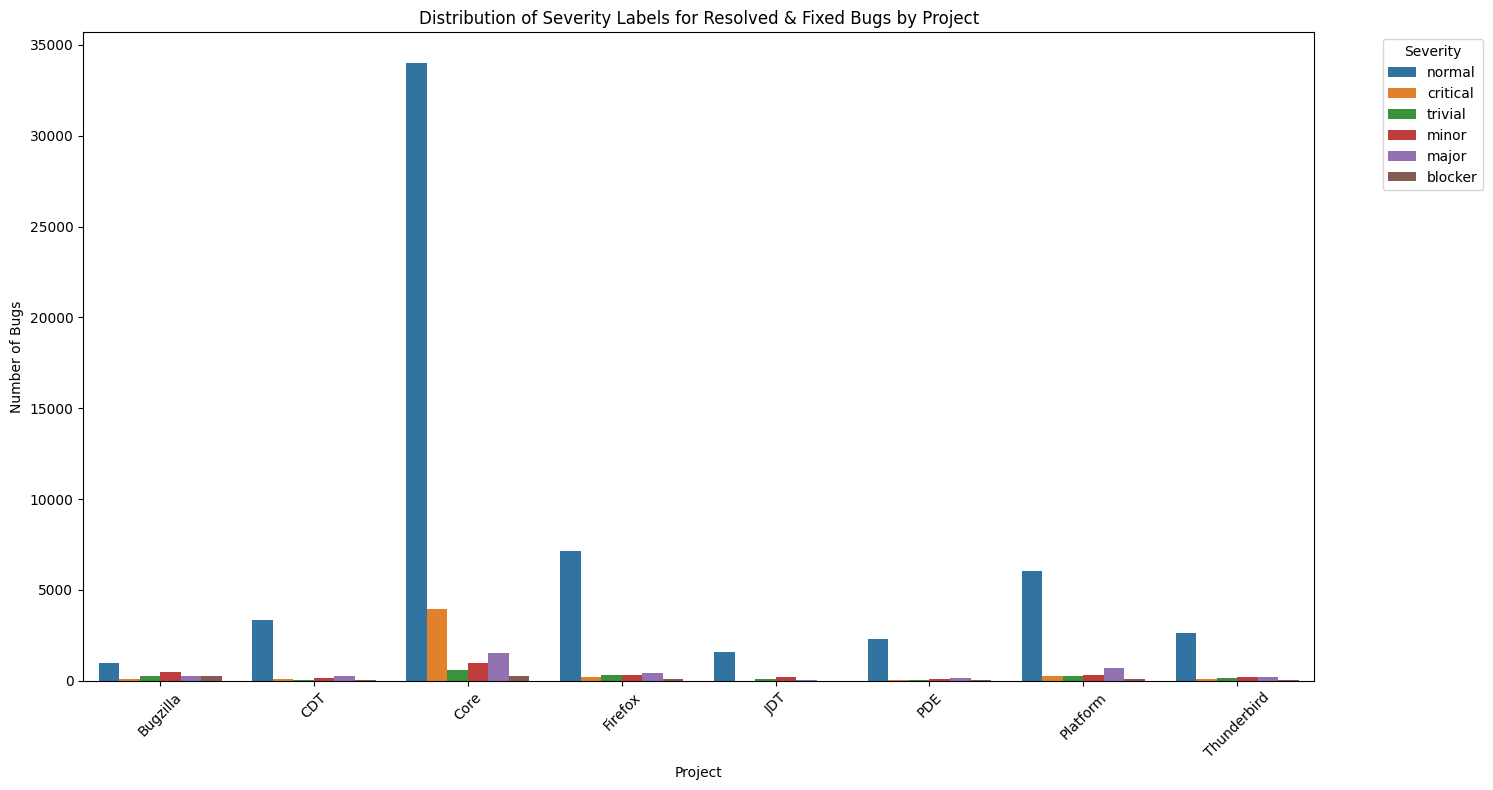


Summary Statistics:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla         262        98    251    483     996      285
CDT               34        79    261    177    3368       63
Core             243      3956   1532   1000   33990      578
Firefox           81       178    414    342    7143      316
JDT                1        10     28    185    1584      120
PDE               13        50    167    118    2285       55
Platform          84       249    677    298    6044      271
Thunderbird       20       115    231    196    2615      133

Percentage Distribution:
severity     blocker  critical  major  minor  normal  trivial
project                                                      
Bugzilla       11.03      4.13  10.57  20.34   41.94    12.00
CDT             0.85      1.98   6.55   4.45   84.58     1.58
Core            0.59      9.58   3.71   2.42   82.30     1.40
Firefox         0.96   

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def get_latest_update(report):
    """Get the latest non-empty update value from a report"""
    updates = report.findall('.//update')
    latest_value = None
    latest_time = -1

    for update in updates:
        when = int(update.find('when').text)
        what = update.find('what').text

        if when > latest_time and what is not None and what.strip():
            latest_time = when
            latest_value = what.strip()

    return latest_value

def parse_xml_file(file_path):
    """Parse XML file and return a dictionary of id: latest_value"""
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return {}

    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        bug_dict = {}

        for report in root.findall('.//report'):
            bug_id = report.get('id')
            latest_value = get_latest_update(report)

            if bug_id and latest_value:
                bug_dict[bug_id] = latest_value.upper()  # Normalize to uppercase

        return bug_dict
    except ET.ParseError as e:
        print(f"Error parsing {file_path}: {e}")
        return {}

def process_project(project):
    print(f"\nProcessing project: {project}")
    project_folder = os.path.join(destination_directory, project)

    # Parse all relevant files
    status_dict = parse_xml_file(os.path.join(project_folder, 'bug_status.xml'))
    resolution_dict = parse_xml_file(os.path.join(project_folder, 'resolution.xml'))
    severity_dict = parse_xml_file(os.path.join(project_folder, 'severity.xml'))

    # Print debug information
    print(f"Total bugs with status: {len(status_dict)}")
    print(f"Status values found: {set(status_dict.values())}")
    print(f"Total bugs with resolution: {len(resolution_dict)}")
    print(f"Resolution values found: {set(resolution_dict.values())}")
    print(f"Total bugs with severity: {len(severity_dict)}")
    print(f"Severity values found: {set(severity_dict.values())}")

    # Create records for bugs that meet all conditions
    records = []
    for bug_id in status_dict:
        if (bug_id in resolution_dict and
            bug_id in severity_dict and
            status_dict[bug_id] == 'RESOLVED' and
            resolution_dict[bug_id] == 'FIXED'):

            records.append({
                'project': project,
                'bug_id': bug_id,
                'severity': severity_dict[bug_id].lower(),
                'status': status_dict[bug_id],
                'resolution': resolution_dict[bug_id]
            })

    df = pd.DataFrame(records)
    print(f"\nFound {len(df)} bugs with status='RESOLVED', resolution='FIXED' and severity for {project}")
    if not df.empty:
        print("\nSeverity distribution:")
        print(df['severity'].value_counts())

    return df

# Process all projects and combine data
dfs = []
for project in projects:
    df = process_project(project)
    if not df.empty:
        dfs.append(df)

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Print data summary
    print("\nOverall Data Summary:")
    print(f"Total number of bugs: {len(all_data)}")
    print("\nBugs per project:")
    print(all_data['project'].value_counts())
    print("\nSeverity levels found:")
    print(all_data['severity'].value_counts())

    # Create visualization
    plt.figure(figsize=(15, 8))
    sns.countplot(data=all_data, x='project', hue='severity')
    plt.title('Distribution of Severity Labels for Resolved & Fixed Bugs by Project')
    plt.xlabel('Project')
    plt.ylabel('Number of Bugs')
    plt.xticks(rotation=45)
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics:")
    summary = all_data.groupby(['project', 'severity']).size().unstack(fill_value=0)
    print(summary)

    # Calculate percentages
    percentages = summary.div(summary.sum(axis=1), axis=0) * 100
    print("\nPercentage Distribution:")
    print(percentages.round(2))
else:
    print("\nNo data found to visualize")
    print("Please check:")
    print("1. Are there any bugs with status='RESOLVED'?")
    print("2. Of those resolved bugs, are any marked as resolution='FIXED'?")
    print("3. Do those resolved and fixed bugs have corresponding severity information?")
    print("4. Are the bug IDs matching across all three files (status, resolution, severity)?")

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive #Skip
from google.colab import drive
drive.mount('/content/drive')

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def process_project(project):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Create an empty DataFrame to store bug data
    bug_data_df = pd.DataFrame(columns=['Project', 'Bug ID', 'Severity Label', 'Resolution Status', 'Short Description'])

    # Load all data into the DataFrame
    for xml_file in ['short_desc.xml', 'severity.xml', 'resolution.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Identify the type of XML file and extract relevant information
            if xml_file == 'short_desc.xml':
                reports = root.findall('.//report')
            elif xml_file == 'severity.xml':
                severities = root.findall('.//report')
            elif xml_file == 'resolution.xml':
                resolutions = root.findall('.//report')

    # Filter bug reports with severity = "enhancement"
    enhancement_bug_reports = [severity for severity in severities if severity.find('.//what[last()]') is not None and severity.find('.//what[last()]').text and severity.find('.//what[last()]').text.lower() == 'enhancement']
    total_enhancement_bug_reports = len(enhancement_bug_reports)

    return total_enhancement_bug_reports

# Display the number of bug reports with severity = "enhancement" for each project
for project in projects:
    total_enhancement_reports = process_project(project)
    print(f"Project: {project}, Total number of bug reports with severity 'enhancement': {total_enhancement_reports}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project: Bugzilla, Total number of bug reports with severity 'enhancement': 34
Project: CDT, Total number of bug reports with severity 'enhancement': 13
Project: Core, Total number of bug reports with severity 'enhancement': 60
Project: Firefox, Total number of bug reports with severity 'enhancement': 77
Project: JDT, Total number of bug reports with severity 'enhancement': 37
Project: PDE, Total number of bug reports with severity 'enhancement': 4
Project: Platform, Total number of bug reports with severity 'enhancement': 56
Project: Thunderbird, Total number of bug reports with severity 'enhancement': 54


In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

# Set to store unique resolution statuses
unique_resolution_statuses = set()

def process_project(project):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Load all data into the DataFrame
    for xml_file in ['resolution.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Extract resolution statuses
            resolutions = root.findall('.//report/update/what')
            statuses = {status.text.lower() for status in resolutions if status.text is not None}
            unique_resolution_statuses.update(statuses)

# Process each project to gather unique resolution statuses
for project in projects:
    process_project(project)

# Display all unique resolution statuses
print("Unique Resolution Statuses:")
for status in unique_resolution_statuses:
    print(status)


Unique Resolution Statuses:
fixed
remind
incomplete
invalid
duplicate
not_eclipse
worksforme
later
wontfix


In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def count_resolution_statuses(project, resolution_statuses):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Load all resolution data into the DataFrame
    for xml_file in ['resolution.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Identify the type of XML file and extract relevant information
            if xml_file == 'resolution.xml':
                resolutions = root.findall('.//report/update')

    # Count bug reports for each specified resolution status
    status_counts = {}
    for status in resolution_statuses:
        filtered_reports = [
            resolution for resolution in resolutions if resolution.find('.//what[last()]') is not None
            and resolution.find('.//what[last()]').text
            and resolution.find('.//what[last()]').text.lower() == status.lower()
        ]
        status_counts[status] = len(filtered_reports)

    return status_counts

# Define the resolution statuses to count
resolution_statuses_to_count = ['fixed', 'remind', 'incomplete', 'invalid', 'duplicate', 'not_eclipse', 'worksforme', 'later', 'wontfix']

# Display the number of bug reports for each specified resolution status in each project
for project in projects:
    total_resolution_statuses = count_resolution_statuses(project, resolution_statuses_to_count)
    print(f"Project: {project}")
    for status, count in total_resolution_statuses.items():
        print(f"Resolution Status: {status.capitalize()}, Total: {count}")
    print("\n")


Project: Bugzilla
Resolution Status: Fixed, Total: 2542
Resolution Status: Remind, Total: 0
Resolution Status: Incomplete, Total: 10
Resolution Status: Invalid, Total: 885
Resolution Status: Duplicate, Total: 892
Resolution Status: Not_eclipse, Total: 0
Resolution Status: Worksforme, Total: 542
Resolution Status: Later, Total: 0
Resolution Status: Wontfix, Total: 213


Project: CDT
Resolution Status: Fixed, Total: 4581
Resolution Status: Remind, Total: 2
Resolution Status: Incomplete, Total: 0
Resolution Status: Invalid, Total: 397
Resolution Status: Duplicate, Total: 704
Resolution Status: Not_eclipse, Total: 70
Resolution Status: Worksforme, Total: 216
Resolution Status: Later, Total: 0
Resolution Status: Wontfix, Total: 132


Project: Core
Resolution Status: Fixed, Total: 50961
Resolution Status: Remind, Total: 0
Resolution Status: Incomplete, Total: 1606
Resolution Status: Invalid, Total: 5262
Resolution Status: Duplicate, Total: 11533
Resolution Status: Not_eclipse, Total: 0
Resol

In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd
from collections import defaultdict

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def analyze_bug_reports(project):
    """
    Analyzes bug reports for a given project, counting fixed bugs by severity.
    Returns a dictionary with counts for each severity level.
    """
    project_folder = os.path.join(destination_directory, project)

    # Dictionary to store bug_id -> severity mapping
    bug_severities = {}
    # Dictionary to store fixed bug IDs
    fixed_bugs = set()
    # Dictionary to store counts by severity
    severity_counts = defaultdict(int)

    # First, load all severity data
    severity_file = os.path.join(project_folder, 'severity.xml')
    if os.path.exists(severity_file):
        try:
            tree = ET.parse(severity_file)
            root = tree.getroot()

            for update in root.findall('.//update'):
                bug_id_elem = update.find('.//bug_id')
                what_elem = update.find('.//what[last()]')

                if bug_id_elem is not None and bug_id_elem.text and what_elem is not None and what_elem.text:
                    bug_severities[bug_id_elem.text] = what_elem.text.lower()
        except ET.ParseError:
            print(f"Warning: Could not parse severity file for {project}")

    # Then, process resolution data
    resolution_file = os.path.join(project_folder, 'resolution.xml')
    if os.path.exists(resolution_file):
        try:
            tree = ET.parse(resolution_file)
            root = tree.getroot()

            for update in root.findall('.//update'):
                bug_id_elem = update.find('.//bug_id')
                what_elem = update.find('.//what[last()]')

                if (bug_id_elem is not None and bug_id_elem.text and
                    what_elem is not None and what_elem.text and
                    what_elem.text.lower() == 'fixed'):
                    fixed_bugs.add(bug_id_elem.text)
        except ET.ParseError:
            print(f"Warning: Could not parse resolution file for {project}")

    # Count fixed bugs by severity
    for bug_id in fixed_bugs:
        if bug_id in bug_severities:
            severity = bug_severities[bug_id]
            severity_counts[severity] += 1

    return dict(severity_counts)

# Process all projects and store results
results = {}
for project in projects:
    print(f"Processing {project}...")
    try:
        results[project] = analyze_bug_reports(project)
    except Exception as e:
        print(f"Error processing {project}: {str(e)}")
        results[project] = {}

# Create a DataFrame for better visualization
df = pd.DataFrame(results).fillna(0)
df = df.astype(int)

# Display results
print("\nBug Reports by Project and Severity (Resolution = Fixed):")
print("=" * 80)
print(df)

# Optional: Save to CSV
df.to_csv('bug_reports_by_severity.csv')

# Print totals
print("\nTotal fixed bugs by project:")
print("-" * 40)
for project in projects:
    total = sum(results[project].values())
    print(f"{project}: {total}")

print("\nTotal fixed bugs by severity:")
print("-" * 40)
total_by_severity = defaultdict(int)
for project_data in results.values():
    for severity, count in project_data.items():
        total_by_severity[severity] += count

for severity, total in sorted(total_by_severity.items()):
    print(f"{severity}: {total}")

Processing Bugzilla...
Processing CDT...
Processing Core...
Processing Firefox...
Processing JDT...
Processing PDE...
Processing Platform...
Processing Thunderbird...

Bug Reports by Project and Severity (Resolution = Fixed):
Empty DataFrame
Columns: [Bugzilla, CDT, Core, Firefox, JDT, PDE, Platform, Thunderbird]
Index: []

Total fixed bugs by project:
----------------------------------------
Bugzilla: 0
CDT: 0
Core: 0
Firefox: 0
JDT: 0
PDE: 0
Platform: 0
Thunderbird: 0

Total fixed bugs by severity:
----------------------------------------


In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def process_project(project):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Load all data into the DataFrame
    for xml_file in ['short_desc.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Identify the type of XML file and extract relevant information
            if xml_file == 'short_desc.xml':
                reports = root.findall('.//report')

    # Count bug reports for the project
    bug_reports_count = len(reports) if reports else 0

    return bug_reports_count

# Display the number of bug reports for each project
for project in projects:
    total_bug_reports = process_project(project)
    print(f"Project: {project}, Total number of bug reports: {total_bug_reports}")


Project: Bugzilla, Total number of bug reports: 4616
Project: CDT, Total number of bug reports: 5640
Project: Core, Total number of bug reports: 74292
Project: Firefox, Total number of bug reports: 69879
Project: JDT, Total number of bug reports: 10814
Project: PDE, Total number of bug reports: 5655
Project: Platform, Total number of bug reports: 24775
Project: Thunderbird, Total number of bug reports: 19237


In [ ]:
import os
import xml.etree.ElementTree as ET
import zipfile
import pandas as pd

# Define paths
zip_file_path = '/content/drive/My Drive/test1.zip'
destination_directory = '/content/unzipped_data/'

# Ensure the destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List of project names to process
projects = ['Bugzilla', 'CDT', 'Core', 'Firefox', 'JDT', 'PDE', 'Platform', 'Thunderbird']

def count_specific_severity(project, severity_label):
    # Define paths for the current project
    project_folder = os.path.join(destination_directory, project)

    # Load all severity data into the DataFrame
    for xml_file in ['severity.xml']:
        file_path = os.path.join(project_folder, xml_file)

        # Check if the file exists
        if os.path.exists(file_path):
            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Identify the type of XML file and extract relevant information
            if xml_file == 'severity.xml':
                severities = root.findall('.//report')

    # Filter bug reports with specific severity
    specific_severity_bug_reports = [
        severity for severity in severities if severity.find('.//what[last()]') is not None
        and severity.find('.//what[last()]').text
        and severity.find('.//what[last()]').text.lower() == severity_label.lower()
    ]

    total_specific_severity_bug_reports = len(specific_severity_bug_reports)
    return total_specific_severity_bug_reports

# Define the severity label to count (e.g., 'trivial')
severity_label_to_count = 'normal'

# Display the number of bug reports with the specific severity label for each project
for project in projects:
    total_specific_severity_reports = count_specific_severity(project, severity_label_to_count)
    print(f"Project: {project}, Total number of bug reports with severity '{severity_label_to_count}': {total_specific_severity_reports}")


Project: Bugzilla, Total number of bug reports with severity 'normal': 2880
Project: CDT, Total number of bug reports with severity 'normal': 4597
Project: Core, Total number of bug reports with severity 'normal': 58340
Project: Firefox, Total number of bug reports with severity 'normal': 49027
Project: JDT, Total number of bug reports with severity 'normal': 8563
Project: PDE, Total number of bug reports with severity 'normal': 4807
Project: Platform, Total number of bug reports with severity 'normal': 19460
Project: Thunderbird, Total number of bug reports with severity 'normal': 13230
